## Description:

    Determine if rarification influences conclusions from ordination and dissimilarity analysis



# Init

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)
library(dplyr)
library(tidyr)
library(vegan)
library(DESeq2)
library(phyloseq)

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: foreach: simple, scalable parallel programming from Revolution Analytics
Use Revolution R for scalability, fault tolerance and more.
http://www.revolutionanalytics.com

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: iterators

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching package: ‘dplyr’


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: The following object is masked from ‘package:gridExtra’:

    combine


  warnings.warn(x, RRuntimeWarning)
/opt/anacon

In [3]:
%%R
# set theme for ggplot

theme_pub = function (base_size = 11, base_family = "Helvetica") 
{
    theme_grey(base_size = base_size, base_family = base_family) %+replace% 
        theme(
            axis.line.x = element_line(size = .5),
            axis.line.y = element_line(size = .5),
            panel.background = element_rect(fill = "white", colour = NA), 
            panel.border = element_rect(fill = NA, color = "black", size = .5), 
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(), 
            strip.background = element_rect(fill = "grey85", 
                colour = "grey20"), 
            legend.key = element_rect(fill = "white", 
                colour = NA), complete = TRUE)
    }


# Loading phyloseq object

In [5]:
%%R
setwd('/home/bryan/ERA/data/MiSeq/20170417_run1/phyloseq/')

In [6]:
%%R 
# loading

physeq.t = readRDS('ERA_thresh.rds')

#remove T0, not necessary
physeq.t = subset_samples(physeq.t, !is.na(Genotype), TRUE)

physeq.t

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4597 taxa and 236 samples ]
sample_data() Sample Data:       [ 236 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 4597 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4597 tips and 4596 internal nodes ]


## Rarify dataset and sqrt transform

In [7]:
%%R
set.seed(45)
phy.r = rarefy_even_depth(physeq.t)

/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: You set `rngseed` to FALSE. Make sure you've set & recorded
 the random seed of your session for reproducibility.
See `?set.seed`


  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: ...

  warnings.warn(x, RRuntimeWarning)


In [8]:
%%R
sample_sums(phy.r)

 ERA-T2_3-1d_85 ERA-T1_3-5c_170  ERA-T2_1-5a_85 ERA-T1_1-2b_170   ERA-T1_1-4b_0 
          11546           11546           11546           11546           11546 
  ERA-T1_4-3d_0 ERA-T1_1-4a_170 ERA-T3_1-3c_170 ERA-T1_4-4a_170  ERA-T1_2-2b_85 
          11546           11546           11546           11546           11546 
  ERA-T3_3-1c_0  ERA-T2_2-2d_85 ERA-T1_1-2d_170  ERA-T1_1-3c_85 ERA-T3_3-4c_170 
          11546           11546           11546           11546           11546 
 ERA-T2_1-3d_85  ERA-T2_4-3c_85  ERA-T1_1-2d_85 ERA-T3_3-2c_170  ERA-T3_4-3d_85 
          11546           11546           11546           11546           11546 
ERA-T3_2-5a_170 ERA-T3_3-1a_170 ERA-T1_1-3c_170  ERA-T2_1-2b_85  ERA-T3_2-2b_85 
          11546           11546           11546           11546           11546 
 ERA-T2_1-2d_85  ERA-T3_4-1b_85   ERA-T3_2-5a_0   ERA-T1_4-1b_0   ERA-T3_1-4a_0 
          11546           11546           11546           11546           11546 
  ERA-T3_1-2d_0  ERA-T2_1-3c

In [9]:
%%R
physeq = transform_sample_counts(phy.r, sqrt)

In [10]:
%%R
sd =sample_data(physeq)
colnames(sd)

 [1] "X.sampleID"      "TubeID"          "ExtractionPlate" "PooledDNAPlate" 
 [5] "Sample.Well.ID"  "PrimerPlate"     "Primer.Number"   "Primer.Well.ID" 
 [9] "X"               "primerFwdLoc"    "primerRevLoc"    "fwd_barcode"    
[13] "rev_barcode"     "PlotID"          "TimePoint"       "Rep"            
[17] "Row"             "Pos"             "Fert"            "PlotIndex"      
[21] "Plant"           "Genotype"        "SeedTreatment"   "R_Year"         
[25] "ERA"             "kgdw_ha"         "FracN.leco"      "FracC.leco"     
[29] "d15N"            "X15N_AtPercent"  "FracN"           "FracN_fromSoil" 
[33] "FracN_fromFert" 


In [12]:
%%R
sd %>%
    filter(TubeID == "390") 

      X.sampleID TubeID ExtractionPlate PooledDNAPlate Sample.Well.ID
1 ERA-T2_2-1d_85    390            ERA2              A            G10
  PrimerPlate Primer.Number Primer.Well.ID  X primerFwdLoc primerRevLoc
1           1            79            G10 NA          1-G         1-10
  fwd_barcode rev_barcode  PlotID TimePoint Rep Row Pos Fert PlotIndex  Plant
1    GGATATCT    TAGCAGAC 2-1d_85        T2   2   1   d   85        70 34N42U
  Genotype SeedTreatment R_Year ERA kgdw_ha FracN.leco FracC.leco d15N
1    34N42     Untreated   2003   3    7518    0.01191    0.43927   NA
  X15N_AtPercent FracN FracN_fromSoil FracN_fromFert
1             NA    NA             NA             NA


In [13]:
%%R
sample_data(physeq)$Rep = as.factor(sample_data(physeq)$Rep)
sample_data(physeq)$Row = as.factor(sample_data(physeq)$Row)
sample_data(physeq)$Fert = as.factor(sample_data(physeq)$Fert)

## Calculate pairwise weighted Unifrac distances between samples

In [14]:
%%R
registerDoParallel(cores=28)
wunif.dist = phyloseq::distance(physeq, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [15]:
%%R
registerDoParallel(cores=28)
bray.dist = distance(physeq, 
                      method = "bray", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [16]:
%%R
physeq %>% 
    sample_data() %>%
    .$Genotype %>%
    levels()

 [1] "322"     "330"     "339"     "3394"    "3475"    "34M95"   "34N42"  
 [8] "3517"    "354"     "3541"    "3618"    "Bare"    "P1151HR"


In [17]:
%%R
sd = sample_data(physeq)
sd = mutate(sd, Planted = ifelse(Genotype == "Bare" | TimePoint == "T0", "BARE", "Rhizosphere"))
rownames(sd) = sd$X.sampleID
sd %>% head
sample_data(physeq) = sd

## NMDS of w-Unifrac

In [18]:
%%R -w 800 -h 350

nmds = ordinate(physeq, 
                method = "NMDS", 
                distance = wunif.dist)

p = plot_ordination(physeq, nmds, justDF = TRUE)



Run 0 stress 0.1370511 
Run 1 stress 0.1429602 
Run 2 stress 0.1473197 
Run 3 stress 0.1462057 
Run 4 stress 0.1765663 
Run 5 stress 0.1511766 
Run 6 stress 0.1438666 
Run 7 stress 0.1493257 
Run 8 stress 0.1470817 
Run 9 stress 0.1525512 
Run 10 stress 0.1381904 
Run 11 stress 0.1460498 
Run 12 stress 0.1429516 
Run 13 stress 0.1430973 
Run 14 stress 0.4173373 
Run 15 stress 0.151355 
Run 16 stress 0.1488676 
Run 17 stress 0.142061 
Run 18 stress 0.1387462 
Run 19 stress 0.1463541 
Run 20 stress 0.1370508 
... New best solution
... Procrustes: rmse 0.0001623779  max resid 0.00157638 
... Similar to previous best
*** Solution reached


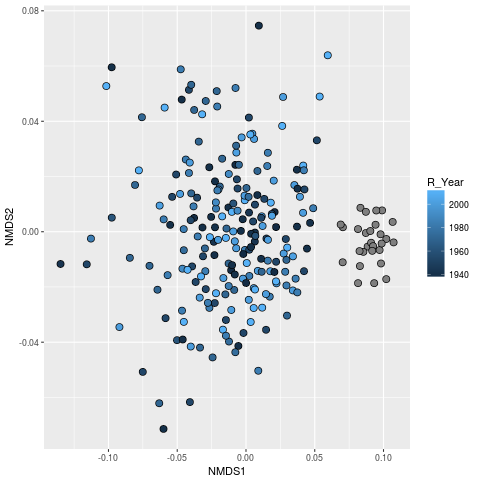

In [19]:
%%R
## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=R_Year), pch = 21, size = 3)
        #scale_size(range=c(2,8))

#p2 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        #geom_point(aes(fill=Plant, size = BD), pch=21) +
        #scale_size(range=c(2,8))

grid.arrange(p1, ncol=1)

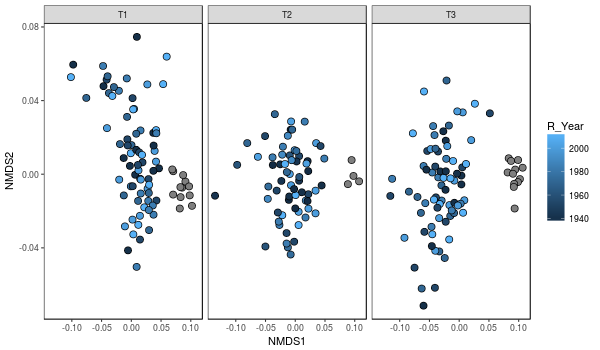

In [20]:
%%R -w 600 -h 350
p2 = p1 + facet_wrap(~TimePoint)+
theme_pub()
p2

# Adonis testing treatment effects

In [21]:
%%R
set.seed(101)

df = as(sample_data(physeq), "data.frame")
d = wunif.dist
df$Fert = as.factor(df$Fert)
Fulladonis = adonis(formula = d ~ Planted + TimePoint + Genotype*TimePoint + SeedTreatment, df, 
                    permutations = 999)
Fulladonis


Call:
adonis(formula = d ~ Planted + TimePoint + Genotype * TimePoint +      SeedTreatment, data = df, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

                    Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Planted              1   0.30357 0.303572  54.369 0.17722  0.001 ***
TimePoint            2   0.09460 0.047300   8.471 0.05523  0.001 ***
Genotype            11   0.07434 0.006758   1.210 0.04340  0.082 .  
SeedTreatment        1   0.00363 0.003632   0.650 0.00212  0.826    
TimePoint:Genotype  12   0.07542 0.006285   1.126 0.04403  0.175    
Residuals          208   1.16139 0.005584         0.67800           
Total              235   1.71296                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## subset of rhizosphere samples at three time points 

In [22]:
%%R
physeq.plantT1 = subset_samples(physeq,  Planted == "Rhizosphere" & TimePoint == "T1")
physeq.plantT1

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4597 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 4597 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4597 tips and 4596 internal nodes ]


In [23]:
%%R
registerDoParallel(cores=28)
T1.wunif.dist = distance(physeq.plantT1, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [24]:
%%R
set.seed(101)

df = as(sample_data(physeq.plantT1), "data.frame")
d = T1.wunif.dist
T1adonis = adonis(formula = d ~ Rep + Fert + Genotype, df, permutations = 999)
T1adonis


Call:
adonis(formula = d ~ Rep + Fert + Genotype, data = df, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
Rep        3   0.04459 0.0148638 2.60574 0.10401  0.001 ***
Fert       2   0.00753 0.0037626 0.65961 0.01755  0.969    
Genotype   5   0.02866 0.0057321 1.00489 0.06685  0.437    
Residuals 61   0.34796 0.0057042         0.81159           
Total     71   0.42874                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


* Fertilization and genotype do not predict MCC at T1, nor does R_Year

## ADONIS at T2

In [25]:
%%R
# subset phyloseq object
physeq.plantT2 = subset_samples(physeq,  Planted == "Rhizosphere" & TimePoint == "T2" & SeedTreatment == "Treated")
physeq.plantT2

# create unifrac distance matrix
registerDoParallel(cores=28)
T2.wunif.dist = distance(physeq.plantT2, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [26]:
%%R
set.seed(101)

df = as(sample_data(physeq.plantT2), "data.frame")
d = T2.wunif.dist
T2adonis = adonis(formula = d ~ Rep + Genotype, df, permutations = 999)
T2adonis


Call:
adonis(formula = d ~ Rep + Genotype, data = df, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
Rep        3  0.038680 0.0128933  2.5798 0.14391  0.001 ***
Genotype  11  0.065177 0.0059252  1.1856 0.24249  0.066 .  
Residuals 33  0.164926 0.0049977         0.61360           
Total     47  0.268783                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


* Genotype has a significant effect on community composition at R1, but ADONIS is not significant for R_Year

In [65]:
%%R
# subset phyloseq object
physeq.plantT2 = subset_samples(physeq,  Planted == "Rhizosphere" & TimePoint == "T2" & SeedTreatment == "Treated")
physeq.plantT2

# create unifrac distance matrix
registerDoParallel(cores=28)
T2.wunif.dist = distance(physeq.plantT2, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [66]:
%%R
set.seed(101)

df = as(sample_data(physeq.plantT2), "data.frame")
d = T2.wunif.dist
T2adonis = adonis(formula = d ~ Rep + Genotype, df, permutations = 999)
T2adonis


Call:
adonis(formula = d ~ Rep + Genotype, data = df, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
Rep        3  0.038680 0.0128933  2.5798 0.14391  0.001 ***
Genotype  11  0.065177 0.0059252  1.1856 0.24249  0.066 .  
Residuals 33  0.164926 0.0049977         0.61360           
Total     47  0.268783                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


* But not in the four untreated seeds; see seed treatment notebook for greater detail

# T3

In [69]:
%%R
# subset phyloseq object
physeq.plantT3 = subset_samples(physeq,  Planted == "Rhizosphere" & TimePoint == "T3")
physeq.plantT3

# create unifrac distance matrix
registerDoParallel(cores=28)
T3.wunif.dist = distance(physeq.plantT3, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

T3.bray.dist = distance(physeq.plantT3, 
                      method = "bray", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)


In [70]:
%%R
set.seed(101)

df = as(sample_data(physeq.plantT3), "data.frame")
d = T3.bray.dist
print("Bray-curtis")
T3adonis = adonis(formula = d ~ Rep + Fert*Genotype, df, permutations = 999)
T3adonis %>% print

print("")
print("weighted UniFrac")
d = T3.wunif.dist
T3adonis = adonis(formula = d ~ Rep + Fert*Genotype, df, permutations = 999)
T3adonis

[1] "Bray-curtis"

Call:
adonis(formula = d ~ Rep + Fert * Genotype, data = df, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

              Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
Rep            3    0.3661 0.122018 1.83424 0.07315  0.001 ***
Fert           2    0.2135 0.106739 1.60454 0.04266  0.001 ***
Genotype       5    0.3833 0.076651 1.15225 0.07659  0.006 ** 
Fert:Genotype 10    0.6484 0.064841 0.97472 0.12958  0.733    
Residuals     51    3.3927 0.066523         0.67801           
Total         71    5.0039                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] ""
[1] "weighted UniFrac"

Call:
adonis(formula = d ~ Rep + Fert * Genotype, data = df, permutations = 999) 

Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

              Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
Rep            3   0.04232 0.01410

* Genotype is not quite significant at T3, but fertilizer is.  However it describes a lower portion of variance than the untransformed data

## Ordinate 

In [31]:
%%R
# subset phyloseq object
physeq.plantT3 = subset_samples(physeq,  Planted == "Rhizosphere" & TimePoint == "T3")
physeq.plantT3

# create unifrac distance matrix
registerDoParallel(cores=28)
T3.wunif.dist = distance(physeq.plantT3, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

T3.bray.dist = distance(physeq.plantT3, 
                      method = "bray", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

%%R
set.seed(101)

df = as(sample_data(physeq.plantT3), "data.frame")
d = T3.bray.dist
print("Bray-curtis")
T3adonis = adonis(formula = d ~ Rep + Fert*Genotype, df, permutations = 999)
T3adonis %>% print

print("")
print("weighted UniFrac")
d = T3.wunif.dist
T3adonis = adonis(formula = d ~ Rep + Fert*Genotype, df, permutations = 999)
T3adonis
%%R
# subset phyloseq object
physeq.plantT2 = subset_samples(physeq,  Planted == "Rhizosphere" & TimePoint == "T2")
physeq.plantT2

# create unifrac distance matrix
registerDoParallel(cores=28)
w.unif.dist = distance(physeq.plantT2, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [32]:
%%R -w 800 -h 350

pcoa = ordinate(physeq.plantT2, 
                method = "PCoA", 
                distance = w.unif.dist)

p = plot_ordination(physeq, pcoa, justDF = TRUE)

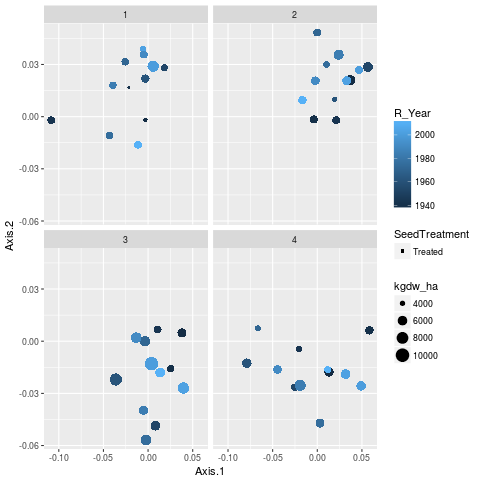

In [33]:
%%R
p1 = ggplot(subset(p, SeedTreatment == "Treated"), aes(x = Axis.1, y = Axis.2)) +
        geom_point(aes(color=R_Year, shape = SeedTreatment, size = kgdw_ha)) + 
        facet_wrap(~Rep)
        
p1

# T3

In [34]:
%%R
# subset phyloseq object
physeq.plantT3 = subset_samples(physeq,  Planted == "Rhizosphere" & TimePoint == "T3")
physeq.plantT3

# create unifrac distance matrix
registerDoParallel(cores=28)
w.unif.dist = distance(physeq.plantT3, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)




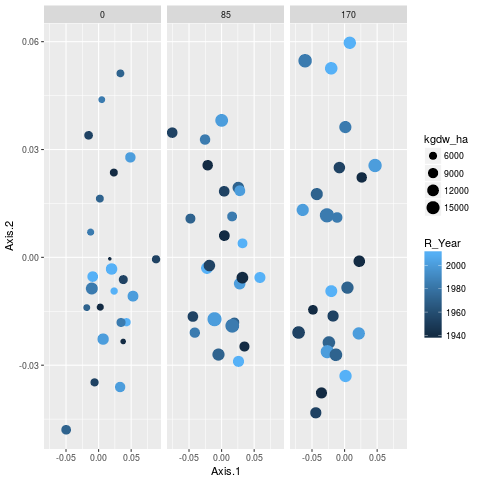

In [35]:
%%R
pcoa = ordinate(physeq.plantT3, 
                method = "PCoA", 
                distance = w.unif.dist)

p = plot_ordination(physeq, pcoa, justDF = TRUE)

p1 = ggplot(p, aes(x = Axis.1, y = Axis.2)) +
        geom_point(aes(color=R_Year, size = kgdw_ha)) +
        facet_wrap(~Fert)
        
p1


# Mantel tests

## T1

In [36]:
%%R
phy = subset_samples(physeq, Planted == "Rhizosphere" & TimePoint == "T1")
phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4597 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 4597 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4597 tips and 4596 internal nodes ]


* generate distance matrices


In [37]:
%%R

registerDoParallel(cores=28)

Time.wunif.dist = phyloseq::distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

Time.bray.dist = phyloseq::distance(phy, 
                      method = "bray", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)


Partial Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel.partial(xdis = Time.bray.dist, ydis = Yd, zdis = Rd, method = "pearson",      permutations = 999) 

Mantel statistic r: 0.06199 
      Significance: 0.068 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0534 0.0683 0.0799 0.0965 
Permutation: free
Number of permutations: 999



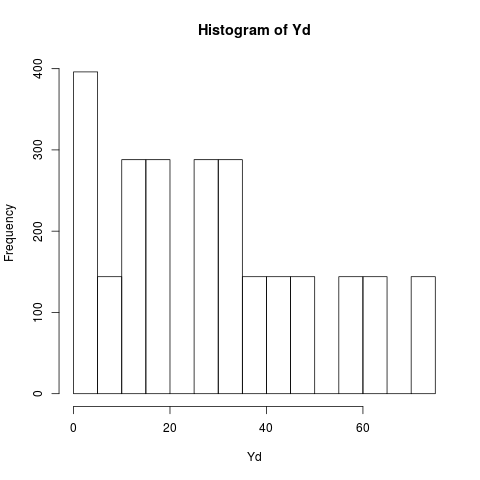

In [38]:
%%R
#Test on soil activity/rhizosphere effect
Sd = sample_data(phy)

# Generate distance matrix of year of release
Yd = dist(Sd[,"R_Year"], method = "euclidian")
hist(Yd)

# generate distance matrix of rep and change all values > 1 to 1
Rd = dist(Sd[,"Rep"])
Rd[Rd > 1] <- 1


M1 = mantel.partial(Time.bray.dist, Yd, Rd, method="pearson", permutations=999)
M1
#Model is not significant within T1 

* Mantel test at V6 is not quite significant for w-unif, but sign for Bray.  
* Spatial autocorrelation may be an issue and Mantel problems

## T2

In [39]:
%%R
# subset phyloseq object to just rhizosphere plants, time point 2 and only treated seeds
phy = subset_samples(physeq, Planted == "Rhizosphere" & TimePoint == "T2" & SeedTreatment == "Treated")
phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4597 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 4597 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4597 tips and 4596 internal nodes ]


* generate distance matrices


In [40]:
%%R

registerDoParallel(cores=28)

Time.wunif.dist = phyloseq::distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

Time.bray.dist = phyloseq::distance(phy, 
                      method = "bray", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [41]:
%%R
#Test on soil activity/rhizosphere effect
Sd = sample_data(phy)

# Generate distance matrix of year of release
Yd = dist(Sd[,"R_Year"], method = "euclidian")
#hist(Yd)

# generate distance matrix of rep and change all values > 1 to 1
Rd = dist(Sd[,"Rep"])
Rd[Rd > 1] <- 1


M1 = mantel.partial(Time.wunif.dist, Yd, Rd, method="pearson", permutations=999)
M1 %>% print

M2 =  mantel.partial(Time.bray.dist, Yd, Rd, method="pearson", permutations=999)
M2 %>% print
#Model is not significant within T2


Partial Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel.partial(xdis = Time.wunif.dist, ydis = Yd, zdis = Rd,      method = "pearson", permutations = 999) 

Mantel statistic r: -0.05455 
      Significance: 0.882 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0688 0.0850 0.1009 0.1133 
Permutation: free
Number of permutations: 999


Partial Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel.partial(xdis = Time.bray.dist, ydis = Yd, zdis = Rd, method = "pearson",      permutations = 999) 

Mantel statistic r: -0.05738 
      Significance: 0.89 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0706 0.0896 0.1030 0.1308 
Permutation: free
Number of permutations: 999



## T3

In [42]:
%%R
# subset phyloseq object to just rhizosphere plants, time point 2 and only treated seeds
phy = subset_samples(physeq, Planted == "Rhizosphere" & TimePoint == "T3")
phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4597 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 4597 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4597 tips and 4596 internal nodes ]


* generate distance matrices


In [43]:
%%R

registerDoParallel(cores=28)

Time.wunif.dist = phyloseq::distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

Time.bray.dist = phyloseq::distance(phy, 
                      method = "bray", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [44]:
%%R
#Test on soil activity/rhizosphere effect
Sd = sample_data(phy)

# Generate distance matrix of year of release
Yd = dist(Sd[,"R_Year"], method = "euclidian")
#hist(Yd)

# generate distance matrix of rep and change all values > 1 to 1
Rd = dist(Sd[,"Rep"])
Rd[Rd > 1] <- 1


M1 = mantel.partial(Time.wunif.dist, Yd, Rd, method="pearson", permutations=999)
M1 %>% print

M2 =  mantel.partial(Time.bray.dist, Yd, Rd, method="pearson", permutations=999)
M2 %>% print



Partial Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel.partial(xdis = Time.wunif.dist, ydis = Yd, zdis = Rd,      method = "pearson", permutations = 999) 

Mantel statistic r: -0.007834 
      Significance: 0.569 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0450 0.0587 0.0764 0.0884 
Permutation: free
Number of permutations: 999


Partial Mantel statistic based on Pearson's product-moment correlation 

Call:
mantel.partial(xdis = Time.bray.dist, ydis = Yd, zdis = Rd, method = "pearson",      permutations = 999) 

Mantel statistic r: -0.003269 
      Significance: 0.522 

Upper quantiles of permutations (null model):
   90%    95%  97.5%    99% 
0.0452 0.0616 0.0779 0.0893 
Permutation: free
Number of permutations: 999



* Mantel test is not significant at T3

# CAP

In [45]:
%%R
# subset phyloseq object to just rhizosphere plants, time point 2 and only treated seeds
phy = subset_samples(physeq, Planted == "Rhizosphere" & TimePoint == "T2" & SeedTreatment == "Treated")
phy

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4597 taxa and 48 samples ]
sample_data() Sample Data:       [ 48 samples by 34 sample variables ]
tax_table()   Taxonomy Table:    [ 4597 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4597 tips and 4596 internal nodes ]


In [46]:
%%R
T2.wunif.dist = phyloseq::distance(phy, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [47]:
%%R
sample_data(phy) %>% colnames

 [1] "X.sampleID"      "TubeID"          "ExtractionPlate" "PooledDNAPlate" 
 [5] "Sample.Well.ID"  "PrimerPlate"     "Primer.Number"   "Primer.Well.ID" 
 [9] "X"               "primerFwdLoc"    "primerRevLoc"    "fwd_barcode"    
[13] "rev_barcode"     "PlotID"          "TimePoint"       "Rep"            
[17] "Row"             "Pos"             "Fert"            "PlotIndex"      
[21] "Plant"           "Genotype"        "SeedTreatment"   "R_Year"         
[25] "ERA"             "kgdw_ha"         "FracN.leco"      "FracC.leco"     
[29] "d15N"            "X15N_AtPercent"  "FracN"           "FracN_fromSoil" 
[33] "FracN_fromFert"  "Planted"        


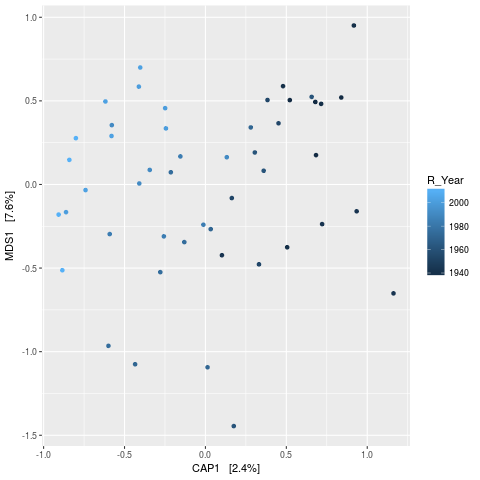

In [48]:
%%R
sample_data(phy)$Rep = as.factor(sample_data(phy)$Rep)
# cap.ord = ordinate(
#     physeq = phy, 
#     method = "CAP",
#     distance = T2.wunif.dist,
#     formula = ~ R_Year + Rep + Condition())

ordcap = ordinate(phy, "CAP", "bray", ~R_Year + Condition(ExtractionPlate))
plot_ordination(phy, ordcap, "samples", color="R_Year")




# # CAP plot
# cap.plot <- plot_ordination(phy, cap.ord, axes = c(1,2)) + 
#     geom_point(aes(fill = Genotype), pch= 21,alpha= 1) 
    #geom_point(colour = "grey90", 
    #    size = 1.5) + 
    
    #scale_color_manual(values = c("#1CE6FF","#B79762", "#004D43", "#8FB0FF", "#997D87", "#5A0007"), name = "Genotype",
 #                      labels = c("B73xB97", "B73xTx303", "ECHES","FAGES","HELAN",     "SORSUD")) 




# Now add the environmental variables as arrows
# arrowmat <- vegan::scores(cap.ord, display = "bp")

# rownames(arrowmat) = c("R_Year", "Rep")
# #rownames(arrowmat) = c("BX", "CB", "LAP", "NAG")

# # Add labels, make a data.frame
# arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)

# Define the arrow aesthetic mapping
# arrow_map <- aes(xend = CAP1, 
#     yend = CAP2, 
#     x = 0, 
#     y = 0, 
#     shape = NULL, 
#     color = NULL, 
#     label = labels)

# label_map <- aes(x = 1.3 * CAP1, 
#     y = 1.3 * CAP2, 
#     shape = NULL, 
#     color = NULL, 
#     label = labels)

# arrowhead = arrow(length = unit(0.02, "npc"))

# # Make a new graphic
# p = cap.plot + 
# geom_segment(arrow_map, 
#     size = .5, 
#     data = arrowdf, 
#     color = "gray", 
#     arrow = arrowhead
#     ) + 
# geom_text(label_map,   
#     data = arrowdf, 
#     show_guide = FALSE) 
# p = p + theme_pub() 
# #p = p + theme(panel.border = element_blank(), legend.position = "right", legend.text = element_text(size = 10)) 
# p = p + theme(legend.position = "left", legend.text = element_text()) 

#save legend for independent formatting
# g_legend<-function(a.gplot){
#     tmp <- ggplot_gtable(ggplot_build(a.gplot))
#     leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
#     legend <- tmp$grobs[[leg]]
#     legend
# }
# 

                        
#legend1 <- g_legend(p)

                     
# p =  p + theme(axis.line.x = element_line(color="black", size = 1),
#     axis.line.y = element_line(color="black", size = 1), legend.position = "left")
# p = p + theme(legend.position = "bottom")
# p

In [49]:
%%R
anova(ordcap)

Permutation test for capscale under reduced model
Permutation: free
Number of permutations: 999

Model: capscale(formula = OTU ~ R_Year + Condition(ExtractionPlate), data = data, distance = distance)
         Df SumOfSqs      F Pr(>F)
Model     1  0.06798 1.0242  0.349
Residual 42  2.78772              


## Finally try DESeq2

In [50]:
%%R 
# loading

phy.thresh = readRDS('ERA_thresh.rds')

#Subset to T1
phy.thresh = subset_samples(phy.thresh, TimePoint == "T1" & SeedTreatment == "Treated", TRUE)
phy.thresh

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4597 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 33 sample variables ]
tax_table()   Taxonomy Table:    [ 4597 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4597 tips and 4596 internal nodes ]


In [51]:
%%R
sample_data(phy.thresh)$Rep = as.factor(sample_data(phy.thresh)$Rep)
sample_data(phy.thresh)$Row = as.factor(sample_data(phy.thresh)$Row)
sample_data(phy.thresh)$Fert = as.factor(sample_data(phy.thresh)$Fert)
sample_data(phy.thresh)$ERA = as.factor(sample_data(phy.thresh)$ERA)

In [61]:
%%R
dds = phyloseq_to_deseq2(phy.thresh, ~Rep + ERA)
d_dds = DESeq(dds, parallel = TRUE)
resultsNames(d_dds) %>% print
DF = results(d_dds, independentFiltering = TRUE)

supp = tax_table(phy.thresh)
            if (!setequal(row.names(supp), row.names(DF))) {
            stop("Ordination and supplementary data indices differ on the following:\n.",
            setdiff(row.names(DF), row.names(supp)))
        }  

        DF = data.frame(DF, supp)
        DF$OTU = rownames(DF)

DF$Test = "R_Year"
        YR = DF

[1] "Intercept" "Rep1"      "Rep2"      "Rep3"      "Rep4"      "ERA1"     
[7] "ERA2"      "ERA3"     


In [64]:
%%R
summary(DF)

    baseMean        log2FoldChange         lfcSE              stat         
 Min.   :  0.0000   Min.   :-1.02717   Min.   :0.07078   Min.   :-3.71746  
 1st Qu.:  0.6085   1st Qu.:-0.12724   1st Qu.:0.22750   1st Qu.:-0.51280  
 Median :  1.3175   Median : 0.01019   Median :0.26942   Median : 0.04885  
 Mean   :  6.5597   Mean   : 0.01129   Mean   :0.24897   Mean   : 0.04761  
 3rd Qu.:  3.9825   3rd Qu.: 0.14869   3rd Qu.:0.28747   3rd Qu.: 0.61332  
 Max.   :534.7727   Max.   : 0.99023   Max.   :0.29366   Max.   : 3.54639  
                    NA's   :9          NA's   :9         NA's   :9         
     pvalue            padj             Rank1                   Rank2     
 Min.   :0.0002   Min.   :0.5614   Bacteria:4597   __Proteobacteria:1219  
 1st Qu.:0.3192   1st Qu.:1.0000                   __Planctomycetes: 840  
 Median :0.5766   Median :1.0000                   __Actinobacteria: 656  
 Mean   :0.5539   Mean   :0.9985                   __Chloroflexi   : 446  
 3rd Qu.:0.8041  

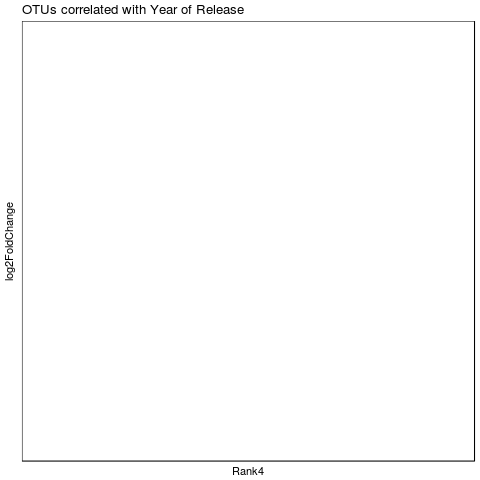

In [62]:
%%R
sigtab = YR %>% filter(padj < 0.1)
x = tapply(sigtab$log2FoldChange, sigtab$Rank4, function(x) max(x))
x = sort(x, TRUE)
sigtab$Rank4 = factor(as.character(sigtab$Rank4), levels=names(x))
# x = tapply(sigtab$log2FoldChange, sigtab$Rank3, function(x) max(x))
# x = sort(x, TRUE)
# sigtab$Rank3 = factor(as.character(sigtab$Rank3), levels=names(x))
    
p2 = ggplot(sigtab, aes(x=Rank4, y=log2FoldChange, size = baseMean)) + 
    geom_point(aes(color = Rank2))+
  theme_pub() +
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5)) + 
    ggtitle("OTUs correlated with Year of Release")  +
   theme(legend.position="right")
#x = tapply(sigtab$log2FoldChange, sigtab$Rank2, function(x) max(x))
#x = sort(x, TRUE)
#x
    p2

# Pseudomonas

In [55]:
%%R
physeq.core %>% 
    tax_table() %>% 
    head()


Error in eval(expr, envir, enclos) : object 'physeq.core' not found


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in eval(expr, envir, enclos) : object 'physeq.core' not found

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Warning messages:

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 1: 
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: In class(x) <- c("tbl_df", "tbl", "data.frame") :
  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning:  Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object

  warnings.warn(x, RRuntimeWarning)
/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 2: 
  warnings.warn

In [56]:
%%R
pdms = subset_taxa(physeq.snorm, Rank6=="__Pseudomonas") %>%
    subset_samples(Ntreat == "Nneg")
pdms


Error in tax_table(physeq) : object 'physeq.snorm' not found


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in tax_table(physeq) : object 'physeq.snorm' not found

  warnings.warn(x, RRuntimeWarning)


In [57]:
%%R
title = "plot_bar; Pseudomonas-only"
plot_bar(pdms, "Genotype", "Abundance", title=title)


Error in inherits(physeq, "phyloseq") : object 'pdms' not found


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in inherits(physeq, "phyloseq") : object 'pdms' not found

  warnings.warn(x, RRuntimeWarning)


In [58]:
%%R
pdms.mean = psmelt(pdms) %>%
        group_by(OTU,TimePoint, Genotype) %>%
         summarize(relAbundance = mean(Abundance))


Error in inherits(physeq, "phyloseq") : object 'pdms' not found


In [59]:
%%R -w 700 -h 700
ggplot(pdms.mean, aes(x = Genotype, y = relAbundance)) +
    geom_bar(stat = "identity") + 
    facet_grid(OTU~TimePoint, scales = "free_x")+
    theme(axis.text.x = element_text(angle = 60))
   # geom_text(aes(y = relAbundance + .001, label=sig))


Error in ggplot(pdms.mean, aes(x = Genotype, y = relAbundance)) : 
  object 'pdms.mean' not found


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in ggplot(pdms.mean, aes(x = Genotype, y = relAbundance)) : 
  object 'pdms.mean' not found

  warnings.warn(x, RRuntimeWarning)


In [60]:
%%R
tax_table(pdms)


Error in tax_table(pdms) : object 'pdms' not found


/opt/anaconda2/lib/python2.7/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Error in tax_table(pdms) : object 'pdms' not found

  warnings.warn(x, RRuntimeWarning)
